

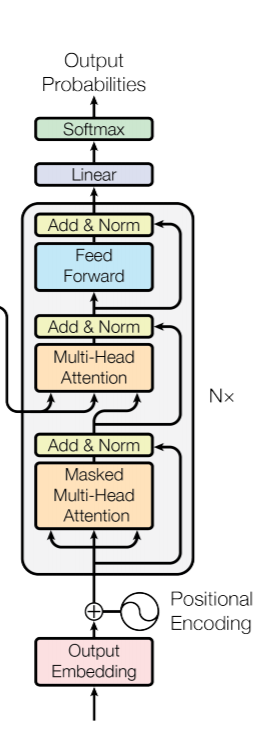

In [ ]:
class MaskAttn():
    def __init__(self,dim,heads):             
        self.head=heads
        self.D=dim
              
    def forward(self,input_vec):# op from previous layers
        return input_vec
    
    def backward(self,err,lr):       
        return err   # to be give for previous layers  
class Coupled_attn():
    def __init__(self,dim,heads):             
        self.head=heads
        self.D=dim
              
    def forward(self,input_vec,enc_vec):# op from previous layers
        return input_vec
    
    def backward(self,err,lr):       
        return err   # to be give for previous layers     
class LayerNormalization():
    def __init__(self,axis=-1):# layer norm are last axis if its first axis its called batch norm
        self.axis=axis
       
    def forward(self,data):
        return data        
        
    def backward(self,err,lr):    
         return err
       
        
class Fclayer(layer):
    def __init__(self,input_dim,output_dim,B1=0.9,B2=0.99):
        pass
    def forward(self,data,time_step):# data shape is batchsize,....,hidden layer
       
        return data
    def zero_grad(self):      
        pass
        
    def update(self,lr):        
        pass
        
    def backward(self,err,time_Step):       
        return err 
    

In [ ]:
class Decoder_block():
    def __init__(self,dim,heads):
        self.AttnM=MaskAttn(dim,heads)
        self.Norm1=LayerNormalization()
        self.EDAtten=Coupled_attn()
        self.Norm2=LayerNormalization()
        self.FFN=Fclayer(dim,dim)
        self.Norm3=LayerNormalization()
    def forward(self,x,enc_op,time_Step):
        y=self.AttnM.forward(x)
        y=self.Norm1.forward(x+y)
        z=self.EDAtten(y,enc_op)
        z=self.Norm2.forward(y+z)     
        a=self.FFN.forward(z)
        a=self.Norm3.forward(a+z)
        
        return z
    def backward(err,time_Step):
        z=self.Norm3.backward(err)
        y=self.FFN.backward(z)        
        y=self.Norm2.backward(y+z)
        x,enc_Der=self.EDAtten.backward(y)
        x=self.Norm1.backward(x+y)
        a=self.AttnM.backward(x)
        return x+a
        
    
        
        return z
    def zero_grad():# after a epoch to remove gradients
        self.EDAtten.zero_grad()
        self.FFN.zero_grad()
        self.AttnM.zero_grad()
        
    
        
        
        